In [1]:
import rebound
%matplotlib inline
import matplotlib.pyplot as plt
import observations
import state
import mcmc
import driver
import numpy as np
import hashlib
import corner
from datetime import datetime

In [2]:
label, Niter, Nwalkers, Scale = "simple_emcee_1", 200000, 16, {'a':0.000001, 'm':0.00000001}

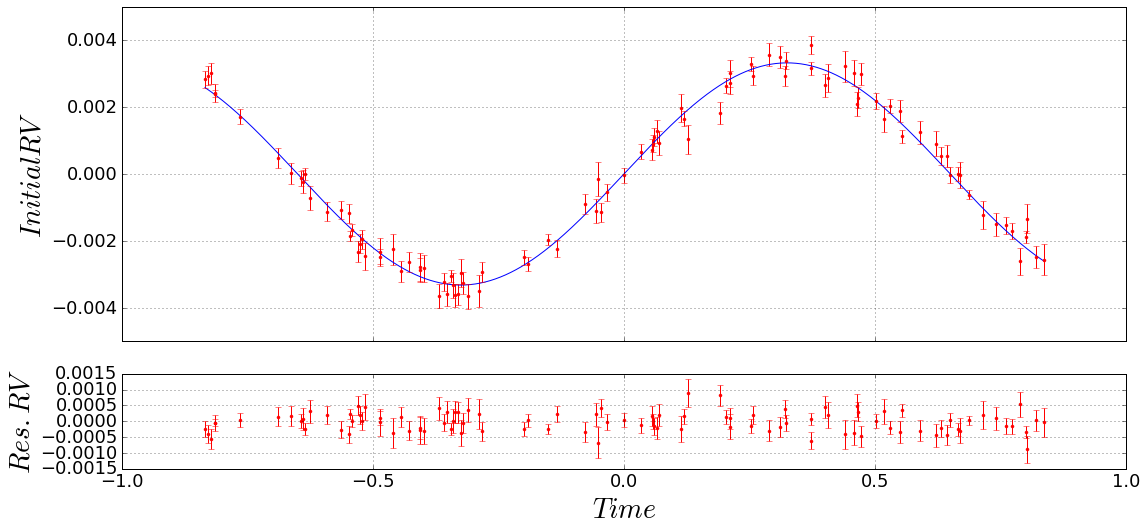

In [3]:
initial_state = state.State(planets= [{'a':0.3500, 'm':0.001965}])
start_state = state.State(planets= [{'a':0.3800, 'm':0.001965}])
obs = driver.createObs(initial_state, 100, 3.0e-4, 9e-5, 1.7)
driver.inLinePlotObs(initial_state, obs, [18,6])

In [4]:
em_bundle, em_h = driver.createEns(label, Niter, start_state, obs, Nwalkers, Scale, printing_every=2000)

Progress: 0.008%, time: 2017-03-02 00:05:27.287703
Progress: 16.008%, time: 2017-03-02 00:07:02.554223
Progress: 32.008%, time: 2017-03-02 00:08:38.040370
Progress: 48.008%, time: 2017-03-02 00:10:14.003316
Progress: 64.008%, time: 2017-03-02 00:11:52.853922
Progress: 80.008%, time: 2017-03-02 00:13:41.223259
Progress: 96.008%, time: 2017-03-02 00:15:29.547840
Error(s): 0
Acceptance rate: 100.000%
The id of the simulation is: 25bf8f23417de1e26092a04d2d1cd166
The end time of the simulation is 2017-03-02 00:15:54.525687


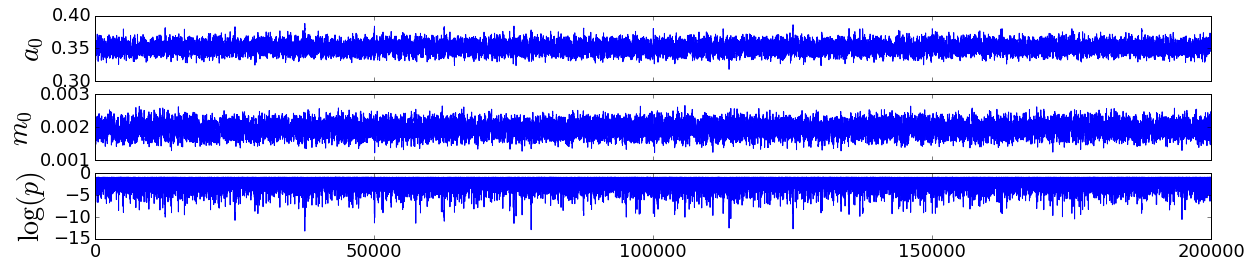

In [5]:
driver.inLinePlotChains(em_bundle, [20,4])

Eliminated burn in, sampled every 2.
Selected some 50 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$m_0$']
[ 0.3512651   0.00195278]


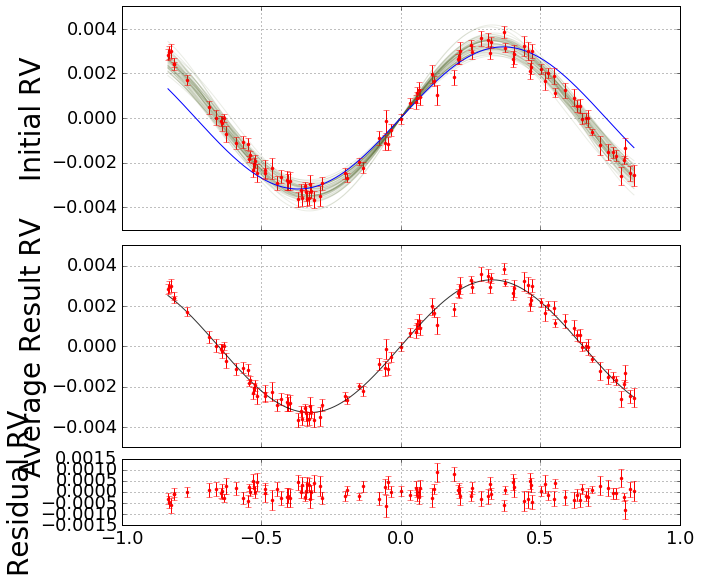

In [6]:
trimmedResEM, trimmedlogpEM = driver.inLinePlotResults(em_bundle, 50, [10,4], 0.5, 2)

AC time 13.5625
AC time 12.125


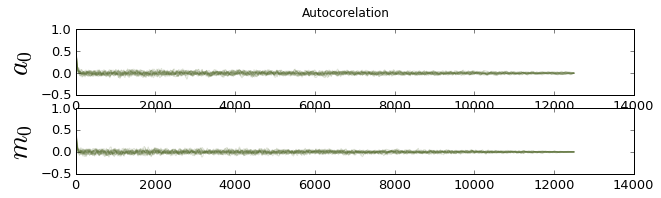

In [7]:
actimesEM = driver.inLinePlotAcTimes(em_bundle, [10, 4])

# Smala

In [8]:
sm_bundle, sm_h = driver.createSMALA(label, Niter/4, start_state, obs, 1.3, 0.14, printing_every=3000)

Progress: 0.002%, 0 accepted steps have been made, time: 2017-03-02 15:16:48.781653
Progress: 6.002%, 2113 accepted steps have been made, time: 2017-03-02 15:17:50.011903
Progress: 12.002%, 4218 accepted steps have been made, time: 2017-03-02 15:18:55.312848
Progress: 18.002%, 6340 accepted steps have been made, time: 2017-03-02 15:19:58.302471
Progress: 24.002%, 8436 accepted steps have been made, time: 2017-03-02 15:20:57.523430
Progress: 30.002%, 10552 accepted steps have been made, time: 2017-03-02 15:21:58.793198
Progress: 36.002%, 12641 accepted steps have been made, time: 2017-03-02 15:22:54.824061
Progress: 42.002%, 14700 accepted steps have been made, time: 2017-03-02 15:23:49.987871
Progress: 48.002%, 16803 accepted steps have been made, time: 2017-03-02 15:24:44.265774
Progress: 54.002%, 18919 accepted steps have been made, time: 2017-03-02 15:25:38.641171
Progress: 60.002%, 21000 accepted steps have been made, time: 2017-03-02 15:26:33.718423
Progress: 66.002%, 23101 accept

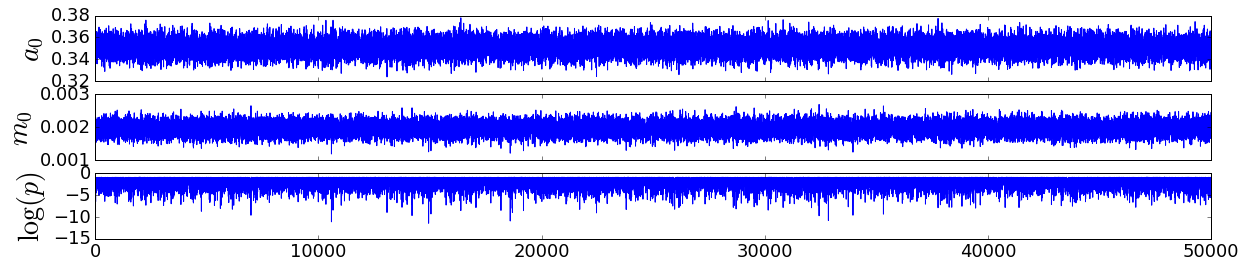

In [9]:
driver.inLinePlotChains(sm_bundle, [20,4])

Eliminated burn in, sampled every 2.
Selected some 50 samples to plot.
Resulting average params state (randomly sampledriver.ind):
['$a_0$', '$m_0$']
[ 0.35123011  0.00195302]


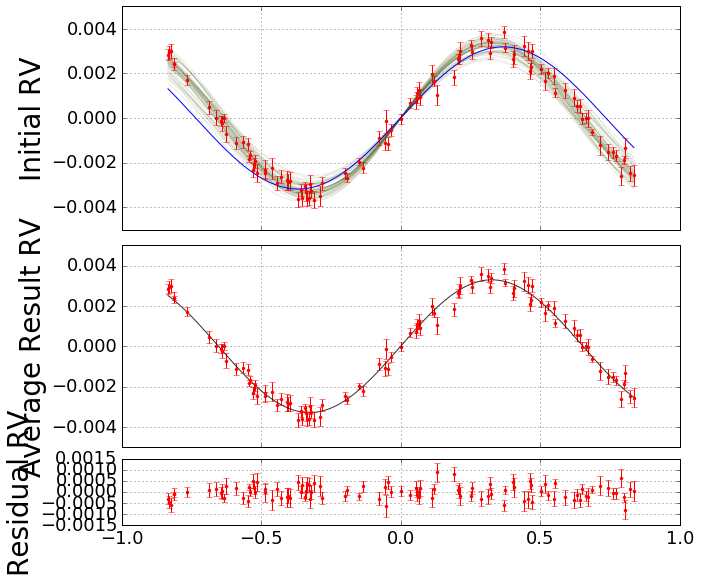

In [17]:
trimmedResSM, trimmedlogpSM = driver.inLinePlotResults(sm_bundle, 50, [10,4], 0.5, 2)

AC time 1.0
AC time 1.0


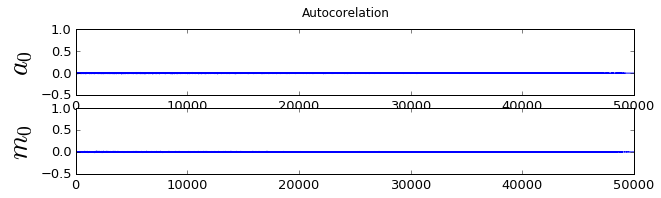

In [18]:
actimesSM = driver.inLinePlotAcTimes(sm_bundle, [10,4])

# Comparison

In [19]:
from scipy import stats

def showCDF(chain1, chain2, size):
    for i in range(len(np.transpose(chain1))):
        fig = plt.figure(figsize=(size[0],size[1]))
        plt.plot(sorted(np.transpose(chain1)[i]), np.linspace(0,1, len(np.transpose(chain1)[i])))
        plt.plot(sorted(np.transpose(chain2)[i]), np.linspace(0,1, len(np.transpose(chain2)[i])))
        plt.ylabel('Fractionsl CDF')
        
def calcKStatistic(chain1, chain2):
    for i in range(len(np.transpose(chain1))):
        print stats.ks_2samp(np.transpose(chain1)[i], np.transpose(chain2)[i])

In [20]:
calcKStatistic(sm_bundle.mcmc_chain, em_bundle.mcmc_chain)

Ks_2sampResult(statistic=0.0097767494650106146, pvalue=0.00094626998963640171)
Ks_2sampResult(statistic=0.0085066085678285885, pvalue=0.0060789858087263752)


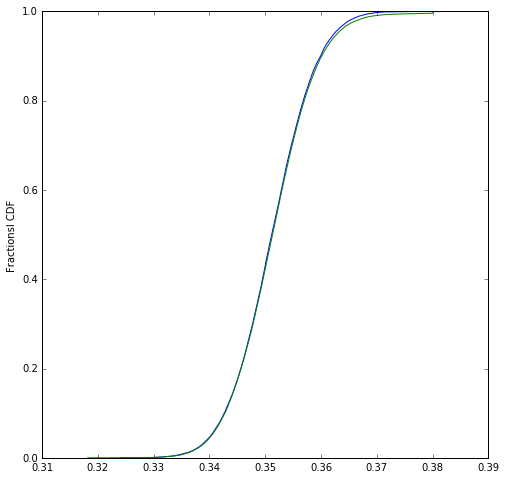

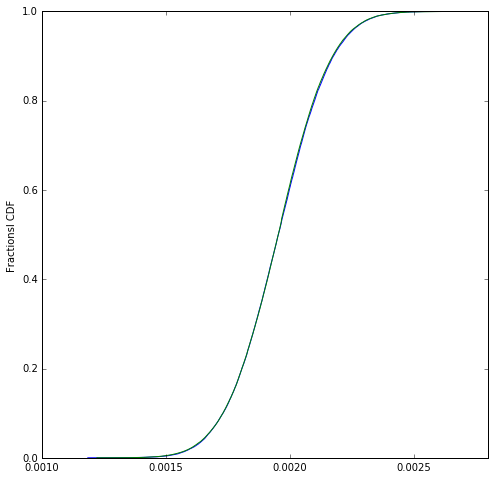

In [21]:
showCDF(sm_bundle.mcmc_chain, em_bundle.mcmc_chain, [8,8])

In [22]:
calcKStatistic(trimmedResSM, trimmedResEM)

Ks_2sampResult(statistic=0.0061399999999999233, pvalue=0.84417938806487502)
Ks_2sampResult(statistic=0.0062800000000000078, pvalue=0.82406924991352137)


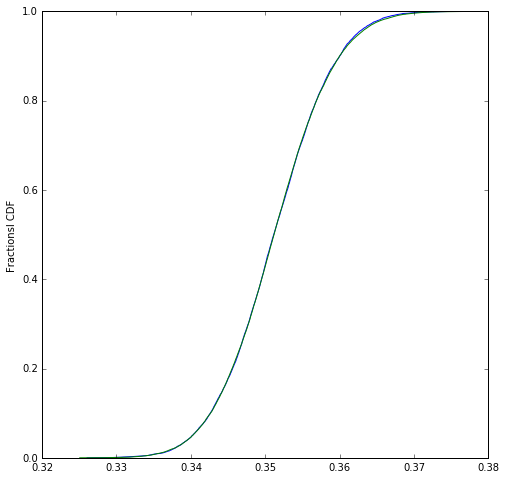

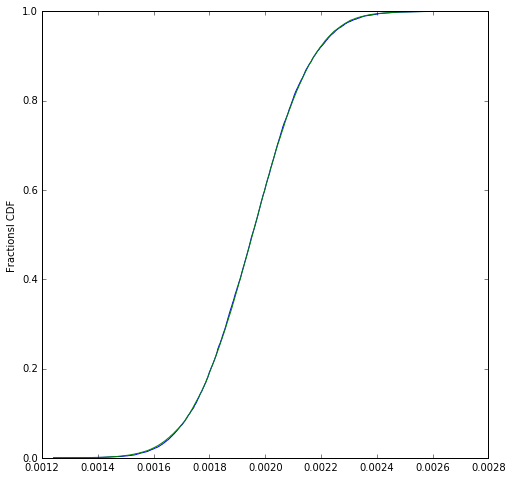

In [23]:
showCDF(trimmedResSM, trimmedResEM, [8,8])